<a href="https://colab.research.google.com/github/miketriana/cap4630-wocjan/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3

##Problem 1

For this problem, I will create the function `get_random_data(w, b, mu, sigma, m)` which generates some random sample data to use with logistic regression. It will return two arrays: a `data` array consisting of m rows, each with two features, and a `labels` array consisting of a single column with m entries.

I will display this data using pyplot and use it to generate training and testing datasets.

###Generating Data

In [0]:
%tensorflow_version 2.x
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random


In [0]:
# Generate random data for logistic regression with two features and one label

def get_random_data(w, b, mu, sigma, m):
    data = np.zeros((m, 2))
    labels = np.zeros((m, 1))

    for i in range(m):
        # Randomly choose class label 0 or 1
        c = random.choice([0, 1])

        # Choose feature x1 randomly within the interval [0, 1)
        x_1 = random.random()

        # Generate noise based on normal distribution
        n = np.random.default_rng().normal(mu, sigma)
        # Choose feature x2 based on x1, weight, bias, label, and noise
        x_2 = w * x_1 + b + ((-1) ** c) * n

        # Update features and label
        data[i][0] = x_1
        data[i][1] = x_2
        labels[i][0] = c

    return [data, labels]

###Displaying the Data
The randomly generated data can be displayed with a scatter plot with the two features as x and y axes and the label represented by color. Points with the label 1 are shown in red while points with the label 0 are shown in blue.

In [0]:
# Display the data generated by the above function

def display_random_data(dataset):
    data = dataset[0]
    labels = dataset[1]

    # Get display color for each point - red if label is 1, blue if label is 0
    point_colors = []
    for label in labels:
        color = "r" if label == 1 else "b"
        point_colors.append(color)

    # Plot x1 and x2 on a scatter plot, using color to show label
    plt.scatter(data[:,0], data[:,1], c=point_colors)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

The red and blue dots form two distinct classes approximately separated by the line `y = w * x + b`, with `w` and `b` being the weight and bias terms used to generate the data.

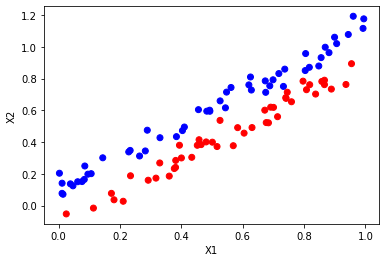

In [4]:
dataset = get_random_data(1, 0, 0.1, 0.05, 100)
display_random_data(dataset)

Using a smaller `mu` value generates data that is closer to this line, while a larger value results in the red and blue groups becoming farther from the line and more separated. A negative value of `mu` flips the red and blue dots to the opposite side of the line.

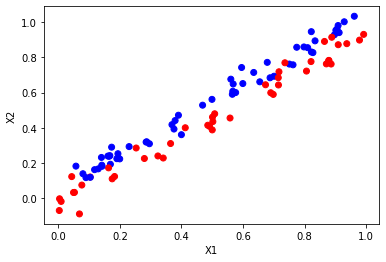

In [5]:
dataset = get_random_data(1, 0, 0.05, 0.05, 100)
display_random_data(dataset)

Additionally, a larger `sigma` value produces data that is more spread out, resulting in more points on the "wrong" side of the line.

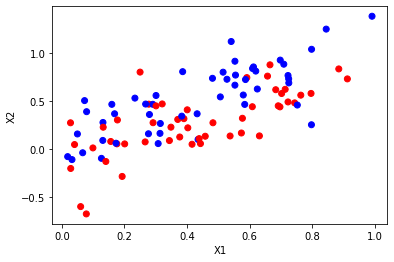

In [6]:
dataset = get_random_data(1, 0, 0.1, 0.25, 100)
display_random_data(dataset)

###Training and Testing Sets
I will generate two datasets, one for training and one for testing. The training set will contain 80% of the data while the testing set will contain 20%.

Training data:


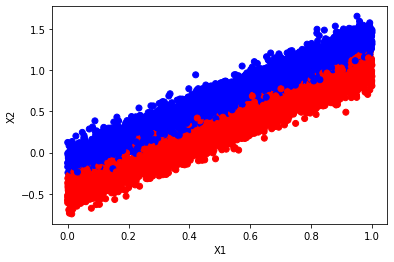

Testing data:


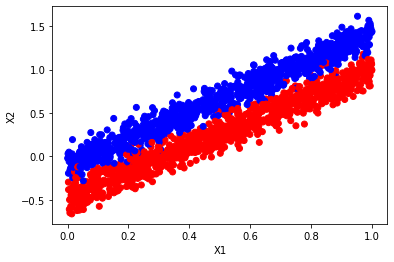

In [7]:
w = 1.5
b = -0.3
mu = 0.2
sigma = 0.1
ds_train = get_random_data(w, b, mu, sigma, 8000)
print("Training data:")
display_random_data(ds_train)
ds_test = get_random_data(w, b, mu, sigma, 2000)
print("Testing data:")
display_random_data(ds_test)

train_data = ds_train[0]
train_labels = ds_train[1]
test_data = ds_test[0]
test_labels = ds_test[1]

## Problem 2

For the second problem, I will train a model with logistic regression to predict the binary classification (red or blue) for each set of features in a dataset. I will create the model using Keras and use the data generated above to train the model.

I will obtain the separating line determined by the model and compare it to the true line used to generate the data.

In [0]:
import tensorflow as tf

###Creating the Model
I will define the architecture for the model. There are two features for each input, x1 and x2. The output will be a single value on the interval [0, 1], where 0 is blue and 1 is red.

Therefore, the model will have an input shape of 2 and an output shape of 1. It will use the sigmoid activation function to fit the output onto the interval [0, 1]. Since this is a binary decision problem, the model will use the binary cross entropy function to calculate loss.

In [9]:
network = tf.keras.models.Sequential()
# add layer with 2 inputs and 1 output
network.add(tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,)))
network.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

###Training the Model
Now I will train the model and record the results for the loss.

In [11]:
epochs = 100
results = network.fit(train_data, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=100, 
                      validation_data=(test_data, test_labels))

Epoch 1/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.6876 - val_loss: 0.6500 - val_accuracy: 0.6775
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6954 - val_loss: 0.6440 - val_accuracy: 0.6775
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6981 - val_loss: 0.6383 - val_accuracy: 0.6790
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.7001 - val_loss: 0.6327 - val_accuracy: 0.6785
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7016 - val_loss: 0.6273 - val_accuracy: 0.6800
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.7057 - val_loss: 0.6219 - val_accuracy: 0.6815
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.7080 - val_loss: 0.6168 - val_accuracy: 0.6830
Epoch 8/100
8

In [0]:
history_dict = results.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

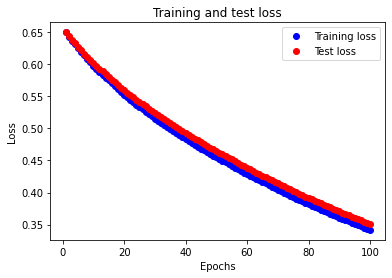

In [13]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Print out some predictions along with their actual labels:

In [14]:
predictions = network.predict(test_data)
for i in range(30):
    print(str(predictions[i]) + "\t\t" + str(test_labels[i]))

[0.6682298]		[1.]
[0.32717752]		[1.]
[0.5852091]		[1.]
[0.19834757]		[0.]
[0.1485281]		[0.]
[0.77527714]		[1.]
[0.09769303]		[0.]
[0.27091354]		[0.]
[0.1962178]		[0.]
[0.87767476]		[1.]
[0.26372674]		[0.]
[0.8318302]		[1.]
[0.65207785]		[1.]
[0.81999165]		[1.]
[0.07512158]		[0.]
[0.08743286]		[0.]
[0.76279]		[1.]
[0.35453713]		[0.]
[0.17514935]		[0.]
[0.75700617]		[1.]
[0.7944968]		[1.]
[0.18432736]		[0.]
[0.06503972]		[0.]
[0.66437113]		[1.]
[0.709974]		[1.]
[0.57924443]		[1.]
[0.9045496]		[1.]
[0.48796844]		[0.]
[0.20691308]		[0.]
[0.1579167]		[0.]


###Results
These predictions are calculated as $\hat{y} = b + w_1x_1 + w_2x_2$

But what are the weights and bias that the model determined?

The `get_weights()` function can be used to extract the weights from the dense layer. The first array contains the weights w1 and w2, and the second array contains the bias weight.

In [15]:
output_weights = network.get_layer(index=0).get_weights()
print(output_weights)

predict_b = output_weights[1]
predict_w1 = output_weights[0][0]
predict_w2 = output_weights[0][1]

[array([[ 6.320277],
       [-5.384421]], dtype=float32), array([-0.7261486], dtype=float32)]


The separating line determined by the model can be obtained by taking the weights from the dense layer and solving for x2:

$x_2 = -(w_1x_1 + b) / w_2$

In [0]:
# The separation line has the endpoints x1 = 0 and x1 = 1.
# The true line is the line between these points calculated using the original w and b
endpoints = np.array([[0], [1]])
y_trueline = w * endpoints + b

# The prediction line is the line between these points according to the x2 function above
if (predict_w2 != 0):
    y_predictline = -(predict_w1 * endpoints + predict_b) / predict_w2
else:
    y_predictline = [[0], [0]]

The separating line determined by the model (shown in green) can be compared to the separating line used to generate the original data (shown in black):

In [0]:
def display_logistic_regression(dataset, X, Y_true, Y_predict):
    data = dataset[0]
    labels = dataset[1]

    # Get display color for each point - red if label is 1, blue if label is 0
    point_colors = []
    for label in labels:
        color = "r" if label == 1 else "b"
        point_colors.append(color)

    # Plot x1 and x2 on a scatter plot, using color to show label
    plt.scatter(data[:,0], data[:,1], c=point_colors)
    # Plot true line in black
    plt.plot(X, Y_true, "k-", linewidth=3, label="True line")
    # Plot prediction in green
    plt.plot(X, Y_predict, "g--", linewidth=3, label="Prediction line")

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

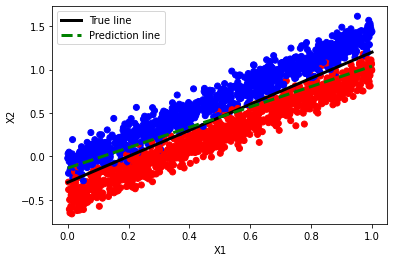

In [18]:
display_logistic_regression(ds_test, endpoints, y_trueline, y_predictline)

###Heatmap
A heatmap can visualize the model's certainty about certain values, where blue is leaning toward 0, red is leaning toward 1, and white is somehwhere in the middle. Notice how the values become less polarized near the separating line, indicating that the model is less reliable at making predictions in this area.

In [0]:
def show_heatmap(x, y, z):
    fig, ax = plt.subplots()

    z_min, z_max = 0, 1

    c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=z_min, vmax=z_max)
    ax.set_title('Heatmap')
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)

    plt.show()

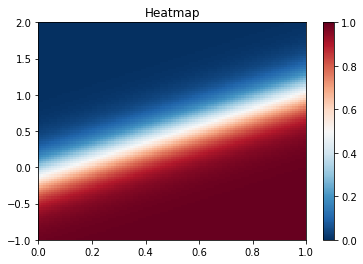

In [20]:
# Generate set of x1 and x2 coordinates
x1, x2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(-1, 2, 100))

coord_matrix = np.array([x1, x2]).transpose(1, 2, 0)
# Reshape into a list of coordinates and get prediction for each one
coord_list = coord_matrix.reshape(100 * 100, 2)
prediction_list = network.predict(coord_list)
# Then reshape predictions back into 2D array
prediction_matrix = prediction_list.reshape(100, 100)

show_heatmap(x1, x2, prediction_matrix)

##Problem 3

For the third problem, I will create and train a logistic regression model from scratch, using the data generated in part 1.

###Creating the Model
Logistic regression is calculated via the formula

$$\hat{y}=a(\sum_{j=1}^{n}w_jx_j+b)$$

Where $a$ is the activation function, $x_j$ is the jth feature, $w_j$ is the jth weight, and $b$ is the bias, which can be considered $w_0$.

To make calculations more convenient, this can be converted to a dot product:

$$\hat{y}=a(w\cdot{x})$$

Where $w=(w_0, w_1, w_2)$ and $x=(1, x1, x2)$.

The activation function for logistic regression is the sigmoid function $\sigma(z)$:

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

In [0]:
def activ(z):
    return 1 / (1 + np.exp(-z))

And binary cross entropy loss is calculated by

$$L=-y\log{\hat{y}}-(1-y)\log{(1-\hat{y})}$$

In [0]:
def bce_loss(y_true, y_hat):
    return -y_true * np.log(y_hat) - (1 - y_true) * np.log(1 - y_hat)

First, I will generate a random set of initial weights $w=(w_0, w_1, w_2)$:

In [23]:
# Select random initial weights for w1, w2, and b
np.random.seed(21)
w_initial = np.random.rand(3, 1)
w_initial

array([[0.04872488],
       [0.28910966],
       [0.72096635]])

Next, I will append a 1 to each set of features for the bias term to make $x=(1, x_1, x_2)$:

In [0]:
# add x0 = 1 
train_data_b = np.column_stack([np.ones((8000, 1)), train_data])
test_data_b = np.column_stack([np.ones((2000, 1)), test_data])

In [25]:
# show the first 5 rows
print(train_data_b[:5, :])

[[ 1.          0.72914306  0.47678219]
 [ 1.          0.18595702  0.15207694]
 [ 1.          0.56501504  0.69246199]
 [ 1.          0.09697661 -0.00309844]
 [ 1.          0.03836704 -0.03689341]]


###Training the Model

The gradient for cross entropy loss is equal to $(\hat{y} - y)\cdot{x}$. The weights are adjusted each epoch according to this gradient and the learning rate.

In [26]:
# The learning rate
lr = 1.0
epochs = 300
weights = w_initial

# Train the model
for epoch in range(epochs):
    # Get prediction
    y_hat = activ(train_data_b.dot(weights))

    # Calculate the loss
    loss = bce_loss(train_labels, y_hat)
    avg_loss = np.average(loss)

    gradient = 1/8000 * train_data_b.T.dot(y_hat - train_labels)
    # Adjust weights according to direction of the gradient
    weights = weights - lr * gradient
    print("Epoch " + str(epoch + 1) + "/" + str(epochs) + " - Loss: " + str(avg_loss))


Epoch 1/300 - Loss: 0.8216132288226073
Epoch 2/300 - Loss: 0.7659406275630354
Epoch 3/300 - Loss: 0.7356570054195292
Epoch 4/300 - Loss: 0.7172169467026625
Epoch 5/300 - Loss: 0.7040571280862137
Epoch 6/300 - Loss: 0.6934093242731715
Epoch 7/300 - Loss: 0.6841518994902437
Epoch 8/300 - Loss: 0.6758169713756524
Epoch 9/300 - Loss: 0.6681893934061625
Epoch 10/300 - Loss: 0.6611525988911349
Epoch 11/300 - Loss: 0.6546302975637295
Epoch 12/300 - Loss: 0.6485644279266815
Epoch 13/300 - Loss: 0.6429066886239672
Epoch 14/300 - Loss: 0.6376151376760096
Epoch 15/300 - Loss: 0.6326526846855844
Epoch 16/300 - Loss: 0.6279862969000468
Epoch 17/300 - Loss: 0.6235864834699134
Epoch 18/300 - Loss: 0.6194268980196165
Epoch 19/300 - Loss: 0.615484001237738
Epoch 20/300 - Loss: 0.611736762149528
Epoch 21/300 - Loss: 0.608166389867572
Epoch 22/300 - Loss: 0.6047560920872238
Epoch 23/300 - Loss: 0.6014908579996815
Epoch 24/300 - Loss: 0.598357263679151
Epoch 25/300 - Loss: 0.5953432980870861
Epoch 26/300 

In [27]:
# Get some predictions
predictions = activ(test_data_b.dot(weights))
for i in range(30):
    print(str(predictions[i]) + "\t\t" + str(test_labels[i]))

[0.72115415]		[1.]
[0.35420579]		[1.]
[0.60362156]		[1.]
[0.17705296]		[0.]
[0.12990627]		[0.]
[0.81657289]		[1.]
[0.08616191]		[0.]
[0.27952778]		[0.]
[0.16744757]		[0.]
[0.8941741]		[1.]
[0.23814936]		[0.]
[0.82862574]		[1.]
[0.64658259]		[1.]
[0.82628525]		[1.]
[0.05818315]		[0.]
[0.08190901]		[0.]
[0.76832703]		[1.]
[0.33604485]		[0.]
[0.12978091]		[0.]
[0.76254763]		[1.]
[0.81025116]		[1.]
[0.17574733]		[0.]
[0.05649557]		[0.]
[0.69376083]		[1.]
[0.69078296]		[1.]
[0.58973148]		[1.]
[0.91041957]		[1.]
[0.4472386]		[0.]
[0.17980583]		[0.]
[0.15218129]		[0.]


###Results

Below is the binary cross entropy loss and accuracy calculated for the test set.

In [28]:
# Get prediction
y_hat = activ(test_data_b.dot(weights))

# Calculate the loss
loss = bce_loss(test_labels, y_hat)
avg_loss = np.average(loss)

print("Test set loss: " + str(avg_loss))

Test set loss: 0.3153320726397666


In [29]:
# Count number of inaccurate predictions
mistakes = 0
for i in range(2000):
    if(abs(y_hat[i] - test_labels[i]) >= 0.5):
        mistakes += 1

# Calculate the accuracy
accuracy = (2000 - mistakes) / 2000
print("Test set accuracy: " + str(accuracy))

Test set accuracy: 0.9475


The separating line determined by the model can be found using the same method as in part 2 and compared to the true line:

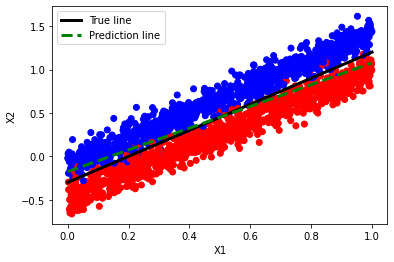

In [30]:
# The predicted weights are now simply found in the weights vector
predict_b, predict_w1, predict_w2 = weights
y_predictline = -(predict_w1 * endpoints + predict_b) / predict_w2

display_logistic_regression(ds_test, endpoints, y_trueline, y_predictline)

###Heatmap

The heatmap for this model is shown below.

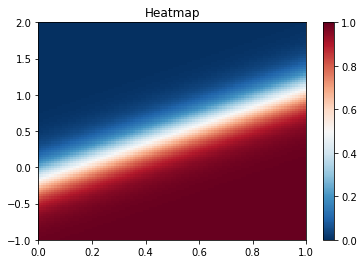

In [31]:
# Append x0 = 1 onto each coordinate
coord_list_b = np.column_stack([np.ones((100 * 100, 1)), coord_list])
# Get predictions for each coordinate
prediction_list = activ(coord_list_b.dot(weights))

# Reshape predictions back into 2D array
prediction_matrix = prediction_list.reshape(100, 100)

show_heatmap(x1, x2, prediction_matrix)

#Sources

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf
Equations for calculating logistic regression - Pawel Wocjan on GitHub

https://colab.research.google.com/drive/144nj1SRtSjpIcKZgH6-GPdA9bWkg68nh
Examples of creating and training a classification model with Keras - Colab

https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-?authuser=1
Examples of manual model training using numpy - Colab

https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib/54088910#54088910
Plotting heatmaps with matplotlib - Erasmus Cedernaes on Stack Overflow